In [1]:
print(11)

11


In [2]:
pip install pandas

     ---------------------------------------- 11.1/11.1 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 347.8/347.8 KB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 15.9/15.9 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 509.2/509.2 KB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\ez\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install tensorflow

     -------------------------------------- 375.7/375.7 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 209.4/209.4 KB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 135.7/135.7 KB 2.7 MB/s eta 0:00:00
     -------------------------------------- 434.9/434.9 KB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 KB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 64.8

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\ez\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ez\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 11.2/11.2 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 307.7/307.7 KB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 2.3 MB/s eta 0:00:00


In [6]:
# 1. 필요한 라이브러리 임포트
# TensorFlow와 Keras의 기능을 사용하기 위해 필요한 모듈을 불러옵니다.

import numpy as np
from tensorflow.keras.models import Sequential # 순차적 모델을 생성하기 위한 모듈
from tensorflow.keras.layers import Dense # 밀집층(fully connected layer)을 추가하기 위한 모듈
from sklearn.model_selection import train_test_split # 데이터를 학습/테스트 세트로 나누기 위한 모듈
from sklearn.datasets import make_classification # 예제 데이터셋 생성 모듈

In [7]:
# 2. 데이터 생성 및 전처리
# 예제용으로 가상 데이터셋을 생성합니다.

X, y = make_classification(
 n_samples=1000, # 데이터 샘플 수
  n_features=20, # 특징(특성) 수
  n_classes=2, # 클래스 수 (이진 분류)
  random_state=42  # 랜덤 시드 고정 (결과 재현 가능성 보장)
 )

 # 데이터를 학습용(train)과 테스트용(test)으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 3. 모델 생성
# Sequential()은 모델을 레이어 순서대로 구성할 수 있도록 해줍니다.

model = Sequential([
 Dense(16, activation='relu', input_shape=(X_train.shape[1],)), # 첫 번째 은닉층
  Dense(8, activation='relu'), # 두 번째 은닉층
  Dense(1, activation='sigmoid') # 출력층 (이진 분류에서 사용)
 ])

 # 여기서 `input_shape`는 입력 데이터의 차원을 지정합니다.
 # `activation`은 각 층에서 사용할 활성화 함수입니다.
 # -relu: 0보다 큰 값은 그대로 두고, 작은 값은 0으로 설정 (비선형성 제공)
 # -sigmoid: 출력값을 0과 1 사이로 제한 (이진 분류에서 확률 계산에 유용)

c:\Users\ez\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# 4. 모델 컴파일
# 모델 학습 전에 학습 방법(optimizer), 손실 함수(loss), 평가 지표(metrics)를 정의합니다.

model.compile(
 optimizer='adam', # 학습 속도를 조정하며 손실 함수의 최솟값을 찾습니다.
  loss='binary_crossentropy', # 이진 분류에서 자주 사용되는 손실 함수
  metrics=['accuracy'] # 학습 성과를 평가할 지표
)

In [12]:
# 5. 모델 훈련
# fit() 메서드는 모델을 학습시키는 역할을 합니다.
history = model.fit(
 X_train, y_train, # 학습용 데이터와 레이블
  validation_split=0.2, # 검증 데이터 비율 (학습 데이터의 20%)
  epochs=10, # 학습 반복 횟수
  batch_size=32, # 한 번의 학습에서 사용하는 데이터 샘플 수
  verbose=1           # 학습 진행 상태를 출력
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8684 - loss: 0.3568 - val_accuracy: 0.8438 - val_loss: 0.3503
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8825 - loss: 0.3479 - val_accuracy: 0.8438 - val_loss: 0.3402
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8690 - loss: 0.3336 - val_accuracy: 0.8500 - val_loss: 0.3315
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8718 - loss: 0.3223 - val_accuracy: 0.8500 - val_loss: 0.3252
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8821 - loss: 0.3205 - val_accuracy: 0.8500 - val_loss: 0.3201
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8865 - loss: 0.3316 - val_accuracy: 0.8500 - val_loss: 0.3160
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8844 - loss: 0.3000 - val_accuracy: 0.8500 - val_loss: 0.3116
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8943 - loss: 0.2850 - val_accuracy: 0.8562 - val_loss:

In [20]:
# 6. 모델 평가
# 테스트 데이터로 학습된 모델을 평가합니다.

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss:.4f}, 테스트 정확도: {test_accuracy:.4f}")

 # 7. 모델 예측
# 학습된 모델을 사용해 새로운 데이터 예측

predictions = model.predict(X_test[:5]) # 테스트 데이터 중 5개의 샘플 예측
print("예측 결과:", predictions)

 # 여기서 predictions의 출력은 확률 값입니다.
 # 일반적으로 0.5 이상은 클래스 1, 미만은 클래스 0으로 간주합니다.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8686 - loss: 0.3797 
테스트 손실: 0.3626, 테스트 정확도: 0.8650
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
예측 결과: [[0.7132256 ]
 [0.5357437 ]
 [0.65856695]
 [0.67359877]
 [0.9435423 ]]


이진 분류 문제 해결

In [51]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 1. 데이터 준비
# 예제 데이터 생성 (여기서는 임의로 데이터를 생성합니다. 실제 데이터로 교체 가능)

from sklearn.datasets import make_classification
X, y=make_classification(n_samples=1000, n_features=20, n_informative=15, 
n_redundant=5, random_state=42)

# 데이터 분할: 훈련, 검증, 테스트 데이터셋
X_train, X_temp, y_train, y_temp=train_test_split(X, 
                                                  y, 
                                                  test_size=0.3, 
                                                  random_state=42)
X_val, X_test, y_val, y_test=train_test_split(X_temp, 
                                              y_temp, 
                                              test_size=0.5, 
                                              random_state=42)

 # 데이터 정규화 (특성 스케일링)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

# 2. 모델 설계
# 입력층, 은닉층, 출력층으로 구성된 이진 분류 모델
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # 입력층
    tf.keras.layers.Dense(64, activation='relu'), # 첫 번째 은닉층
    tf.keras.layers.Dropout(0.5), # 과적합 방지를 위한 Dropout
    tf.keras.layers.Dense(32, activation='relu'), # 두 번째 은닉층
    tf.keras.layers.Dense(1, activation='sigmoid') # 출력층 (Sigmoid 활성화 함수)
 ])

In [52]:
# 3. 모델 컴파일
# 손실 함수: Binary Cross-Entropy
# 최적화 알고리즘: Adam
# 평가지표: Accuracy
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# 4. Early Stopping 설정
# 검증 데이터 손실이 개선되지 않으면 학습을 조기에 종료
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                patience=5, 
                                                restore_best_weights=True)

 # 5. 모델 훈련
history=model.fit(X_train, y_train, 
                  validation_data=(X_val, y_val), 
                  epochs=50, batch_size=32, 
                  callbacks=[early_stopping])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4917 - loss: 0.7950 - val_accuracy: 0.6733 - val_loss: 0.6314
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6008 - loss: 0.6558 - val_accuracy: 0.7667 - val_loss: 0.5469
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 0.5889 - val_accuracy: 0.8400 - val_loss: 0.4834
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7695 - loss: 0.5226 - val_accuracy: 0.8667 - val_loss: 0.4235
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8211 - loss: 0.4532 - val_accuracy: 0.8800 - val_loss: 0.3755
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8033 - loss: 0.4453 - val_accuracy: 0.9000 - val_loss: 0.3314
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8673 - loss: 0.3779 - val_accuracy: 0.9000 - val_loss: 0.3013
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8605 - loss: 0.3479 - val_accuracy: 0.9000 - val_loss:

In [53]:
 # 6. 모델 평가
# 테스트 데이터로 성능 평가
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print(f"TestLoss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9301 - loss: 0.1890 
TestLoss: 0.1592, Test Accuracy: 0.9467


In [54]:
# 7. 예측
# 새로운 데이터에 대한 예측 수행
predictions=model.predict(X_test)
predicted_classes=(predictions>0.5).astype(int) # 0.5를 기준으로 클래스 결정

# 8. 분류 보고서 출력
# 실제 값과 예측 값을 비교하여 성능 지표 확인
print("\nClassificationReport:")
print(classification_report(y_test, predicted_classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

ClassificationReport:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        79
           1       0.93      0.96      0.94        71

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [ ]:
pip install matplotlib

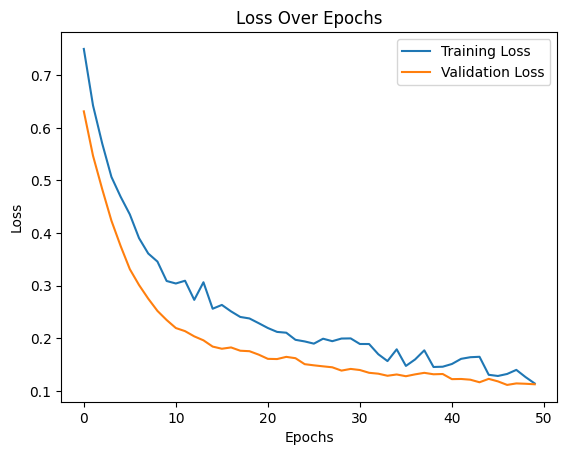

In [56]:
# 9. 학습 결과 시각화 (Optional)
import matplotlib.pyplot as plt

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

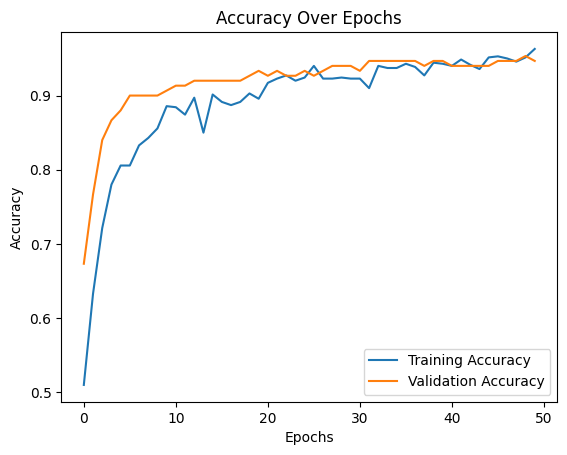

In [57]:
 # 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
# 필요한 라이브러리 가져오기
from tensorflow.keras.models import Sequential # 순차적 모델 생성
from tensorflow.keras.layers import Dense # 완전 연결(Dense) 층
from tensorflow.keras.utils import to_categorical # 원-핫 인코딩
from tensorflow.keras.datasets import mnist # MNIST 데이터셋 가져오기 

# 1. 데이터 로드 및 전처리
# MNIST 데이터셋을 훈련 세트와 테스트 세트로 분리
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 입력 데이터(이미지)를 1차원 벡터로 변환하고 정규화 (0~1 범위로 스케일링)
x_train=x_train.reshape(-1, 784) /255.0 # 28x28 이미지를 784 길이의 벡터로 변환
x_test=x_test.reshape(-1, 784) /255.0

# 레이블(출력 값)을 원-핫 인코딩 (예: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)

 # 2. 모델 구성
model=Sequential([
 # 첫 번째 은닉층: 뉴런 128개, 활성화 함수 ReLU, 입력 크기는 784
  Dense(128, activation='relu', input_shape=(784,)),
 # 두 번째 은닉층: 뉴런 64개, 활성화 함수 ReLU
 Dense(64, activation='relu'),
 # 출력층: 뉴런 10개 (클래스 수), 활성화 함수 Softmax
 Dense(10, activation='softmax')
 ])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step


c:\Users\ez\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 3. 모델 컴파일
# 손실 함수: Categorical Crossentropy
# 옵티마이저: Adam (효율적인 경사 하강법 알고리즘)
# 평가 지표: 정확도 (accuracy)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 훈련
# 훈련 데이터(x_train, y_train)로 학습, 검증 데이터로 성능 확인
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 5. 모델 평가
# 테스트 데이터(x_test, y_test)로 모델 성능 평가
test_loss, test_accuracy=model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_accuracy}")

# 6. 예측
# 테스트 데이터의 첫 번째 샘플을 예측
predictions=model.predict(x_test[:1])
print(f"Softmax출력: {predictions[0]}") # 각 클래스에 대한 확률 값
print(f"예측 클래스: {predictions.argmax()}") # 확률이 가장 높은 클래스

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8677 - loss: 0.4616 - val_accuracy: 0.9613 - val_loss: 0.1326
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9646 - loss: 0.1172 - val_accuracy: 0.9635 - val_loss: 0.1225
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9761 - loss: 0.0751 - val_accuracy: 0.9660 - val_loss: 0.1168
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9831 - loss: 0.0535 - val_accuracy: 0.9698 - val_loss: 0.1022
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0448 - val_accuracy: 0.9706 - val_loss: 0.1095
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9898 - loss: 0.0316 - val_accuracy: 0.9701 - val_loss: 0.1067
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9922 - loss: 0.0252 - val_accuracy: 0.9707 - val_loss: 0.1057
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9927 - loss: 0.0235 - 